### Importing some required python libraries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

reading the data using pandas

In [2]:
df = pd.read_csv("diabetes.csv")

displays first five rows of the dataset.

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


displays the last five rows of the dataset.

In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Displaying the shape of the data : it contains 768 records and 9 columns.

In [5]:
df.shape

(768, 9)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The below function verifies that there are no missing values in the data.

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

displaying the different datatypes in the dataset

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Using correlation( ), we can obtain the impact of each column on the outcome.

In [9]:
corrmatrix = df.corr()
corrmatrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Data Visualization

The below bar plot depicts the count of total positive(1) and negative(0) outcomes of the entire dataset.

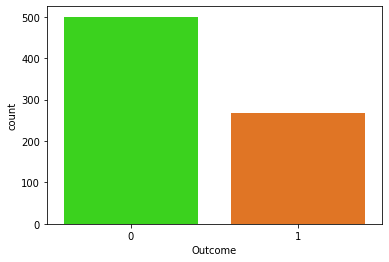

In [10]:
sns.countplot(x = "Outcome", data = df, palette = 'gist_ncar')
plt.show()

The below barplots are the barplots of some important columns of the dataset and for the columns which have very huge values, are plotted by taking some of the values instead of all the values in the dataset.

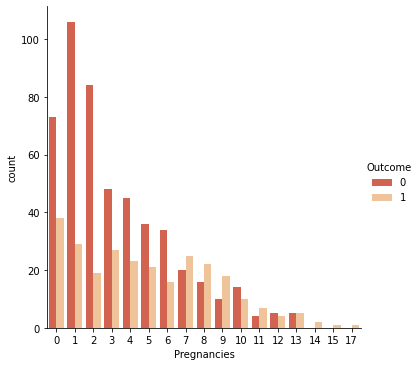

In [11]:
sns.catplot(x = 'Pregnancies', hue = 'Outcome',kind = 'count', data = df,palette = 'OrRd_r')
plt.show()

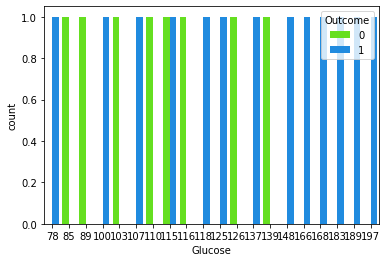

In [12]:
sns.countplot(x = df.loc[0:20,'Glucose'], hue = 'Outcome', data = df, palette = 'gist_rainbow')
plt.show()

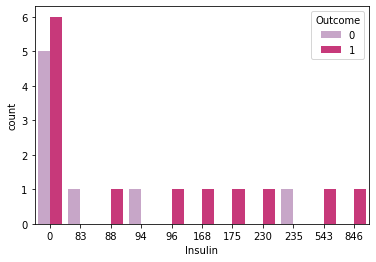

In [13]:
sns.countplot(x = df.loc[0:20,'Insulin'], hue = 'Outcome', data = df, palette = 'PuRd')
plt.show()

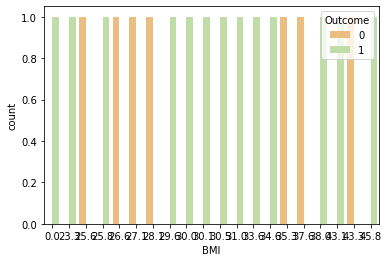

In [14]:
sns.countplot(x = df['BMI'].head(20), hue = 'Outcome', data = df, palette = 'Spectral')
plt.show()

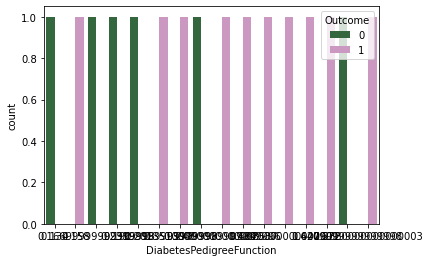

In [15]:
sns.countplot(x = df.loc[0:15,'DiabetesPedigreeFunction'], hue = 'Outcome', data = df, palette = 'cubehelix')
plt.show()

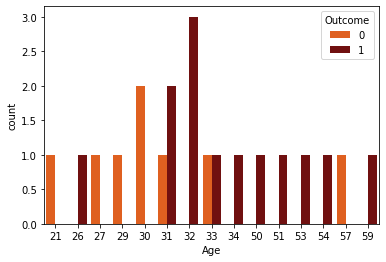

In [16]:
sns.countplot(x = df.loc[0:20,'Age'], hue = 'Outcome', data = df, palette = 'gist_heat_r')
plt.show()

Plotting the Correlation Matrix.

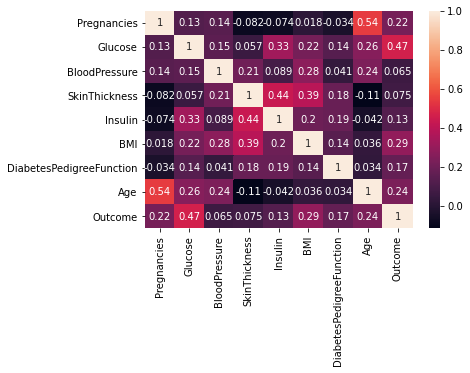

In [17]:
sns.heatmap(corrmatrix,annot = True)
plt.show()

## Data Preprocessing

As all the columns of the dataset are not necessary, we use only the columns which have major impact on the outcome.In the below statement, I've used columns which have an impact >0.10.

In [18]:
x = df[['Pregnancies', 'Glucose','Insulin','BMI','DiabetesPedigreeFunction' ,'Age']].values
x

array([[  6.   , 148.   ,   0.   ,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,   0.   ,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,   0.   ,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   , 112.   ,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,   0.   ,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,   0.   ,  30.4  ,   0.315,  23.   ]])

In [19]:
y = df['Outcome'].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

### Splitting the data into training and test sets.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.2,random_state = 5932)

In [22]:
x_test

array([[9.000e+00, 1.450e+02, 1.300e+02, 3.790e+01, 6.370e-01, 4.000e+01],
       [3.000e+00, 1.700e+02, 2.250e+02, 3.450e+01, 3.560e-01, 3.000e+01],
       [1.000e+00, 8.500e+01, 0.000e+00, 2.660e+01, 3.510e-01, 3.100e+01],
       [3.000e+00, 1.250e+02, 0.000e+00, 3.160e+01, 1.510e-01, 2.400e+01],
       [0.000e+00, 1.140e+02, 2.850e+02, 4.420e+01, 1.670e-01, 2.700e+01],
       [0.000e+00, 1.070e+02, 0.000e+00, 2.640e+01, 1.330e-01, 2.300e+01],
       [0.000e+00, 1.290e+02, 0.000e+00, 3.120e+01, 7.030e-01, 2.900e+01],
       [1.000e+00, 1.140e+02, 2.000e+02, 3.810e+01, 2.890e-01, 2.100e+01],
       [4.000e+00, 1.410e+02, 0.000e+00, 2.760e+01, 2.440e-01, 4.000e+01],
       [8.000e+00, 1.000e+02, 0.000e+00, 3.870e+01, 1.900e-01, 4.200e+01],
       [4.000e+00, 1.830e+02, 0.000e+00, 2.840e+01, 2.120e-01, 3.600e+01],
       [1.300e+01, 7.600e+01, 0.000e+00, 3.280e+01, 1.800e-01, 4.100e+01],
       [0.000e+00, 1.980e+02, 2.740e+02, 4.130e+01, 5.020e-01, 2.800e+01],
       [0.000e+00, 1.110e

### Using Feature Scalaing to scale the data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

After Scaling, the x_test is

In [26]:
x_test

array([[ 1.47186428e+00,  8.93819109e-01,  4.92329399e-01,
         7.45059388e-01,  6.04697673e-01,  6.09665434e-01],
       [-2.30266626e-01,  1.70408602e+00,  1.42460731e+00,
         3.22355850e-01, -3.06243186e-01, -2.43866174e-01],
       [-7.97643593e-01, -1.05082148e+00, -7.83419315e-01,
        -6.59808255e-01, -3.22452098e-01, -1.58513013e-01],
       [-2.30266626e-01,  2.45605580e-01, -7.83419315e-01,
        -3.81854037e-02, -9.70808581e-01, -7.55985138e-01],
       [-1.08133208e+00, -1.10911860e-01,  2.01341440e+00,
         1.52830418e+00, -9.18940062e-01, -4.99925656e-01],
       [-1.08133208e+00, -3.37786595e-01, -7.83419315e-01,
        -6.84673169e-01, -1.02916066e+00, -8.41338299e-01],
       [-1.08133208e+00,  3.75248286e-01, -7.83419315e-01,
        -8.79152318e-02,  8.18655313e-01, -3.29219334e-01],
       [-7.97643593e-01, -1.10911860e-01,  1.17927101e+00,
         7.69924303e-01, -5.23442607e-01, -1.01204462e+00],
       [ 5.34218573e-02,  7.64176403e-01, -7.834

## Logististic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
classifier  = LogisticRegression()

In [29]:
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the outcome using the model

In [30]:
pred_y = classifier.predict(x_test)

In [31]:
pred_y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [32]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

### Checking the Accuracy of the model.

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, pred_y)

0.8831168831168831

### Checking the Accuracy by using Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, pred_y)

array([[103,   9],
       [  9,  33]])

In [37]:
acc = (103 + 33)/(103 + 33 + 9 + 9)
acc

0.8831168831168831